<a href="https://colab.research.google.com/github/jsebastianquiroga/Semestre_3/blob/main/DL/Espiral_suiza_Lineal_%26_no_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/Atcold/pytorch-Deep-Learning

fatal: destination path 'pytorch-Deep-Learning' already exists and is not an empty directory.


In [ ]:
import os
os.chdir('pytorch-Deep-Learning')

In [ ]:
import torch
from torch import nn, optim
from math import pi as π
import math

In [ ]:
from res.plot_lib import plot_data, plot_model, set_default

In [ ]:
set_default()

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
seed = 12345
torch.manual_seed(seed)
N = 1000  # observaciones_por_clase
n = 2     #dimensiones/variables
K = 3      #lables/clases
d = 100   # Cantidad_capas_ocultas

num_classes = 3  # Número de clases

# Crear un tensor de zeros con la forma (N * num_classes, n) y moverlo al dispositivo (GPU o CPU)
X = torch.zeros(N * num_classes, n).to(device)

# Crear un tensor de zeros con la forma (N * num_classes) y especificar el tipo de dato como 'long'
# Luego moverlo al dispositivo (GPU o CPU)
y = torch.zeros(N * num_classes, dtype=torch.long).to(device)

# Iterar a través de todos los elementos en el rango de num_classes
for c in range(num_classes):
    index = 0
    t = torch.linspace(0, 1, N)
    
    # Calcular el 'inner_var' usando linspace y agregar ruido
    inner_var = torch.linspace(
        # Inicio del linspace cuando t = 0
        (2 * math.pi / num_classes) * c,
        # Fin del linspace cuando t = 1
        (2 * math.pi / num_classes) * (2 + c),
        N
    ) + torch.randn(N) * 0.2

    # Iterar a través del rango de N * c a N * (c + 1)
    for ix in range(N * c, N * (c + 1)):
        # Asignar el valor de t[index] multiplicado por un tensor creado a partir de sin(inner_var[index]) y cos(inner_var[index])
        X[ix] = t[index] * torch.FloatTensor((math.sin(inner_var[index]), math.cos(inner_var[index])))
        
        # Asignar el valor de 'c' al tensor 'y' en la posición 'ix'
        y[ix] = c
        index += 1

# Imprimir las dimensiones de los tensores 'X' e 'y'
print("shapes:")
print("X:", tuple(X.size()))
print("y:", tuple(y.size()))


shapes:
X: (3000, 2)
y: (3000,)


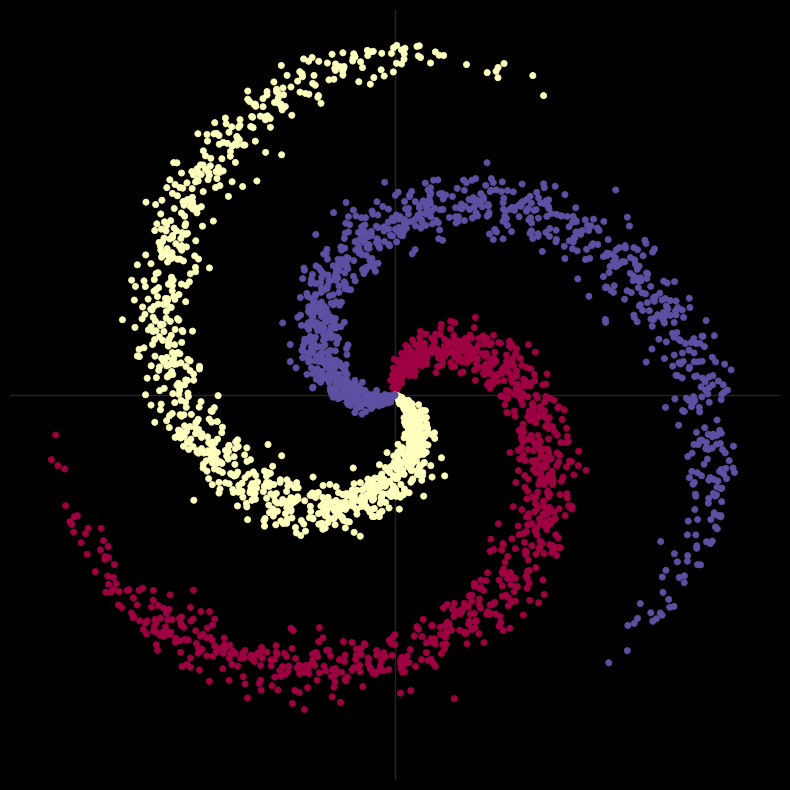

In [ ]:
plot_data(X, y)

# Modelo Lineal

In [ ]:
learning_rate = 1e-3
lambda_l2 = 1e-5

In [ ]:
import sys

def overwrite(text):
    sys.stdout.write("\r" + text)
    sys.stdout.flush()
def acc(logits, labels):
    _, predictions = torch.max(logits, dim=1)
    correct = (predictions == labels).sum().item()
    total = labels.numel()
    return correct / total

In [ ]:
# Definición del modelo
model = nn.Sequential(
    nn.Linear(n, d),
    # nn.ReLU(),  # Comenta esta línea para un modelo lineal
    nn.Linear(d, K)  # (Opcional) Comenta esta línea y descomenta la siguiente para mostrar incrustaciones 2D a continuación
    # nn.Linear(d, 2), nn.Linear(2, K)
)
model.to(device)  # enviar al dispositivo (GPU o CPU) si es posible

# Calcular la entropía cruzada dado los logits de salida
C = torch.nn.CrossEntropyLoss(reduction='none')

# Utilizar el optimizador Adam
optimiser = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=lambda_l2)  # L2 incorporado

# Bucle de entrenamiento en lotes completos
for t in range(2_000):
    
    # Realizar una pasada hacia adelante para obtener los logits
    l = model(X)
    
    # Calcular la energía libre F
    F = C(l, y)
    L = F.mean()
    
    # Poner a cero los gradientes
    optimiser.zero_grad()
    
    # Pasada hacia atrás para calcular y acumular el gradiente
    # de la energía libre con respecto a nuestros parámetros aprendibles
    L.backward()
    
    # Actualizar los parámetros
    optimiser.step()
    
    # Mostrar la época, L y la precisión
    overwrite(f'[EPOCH]: {t}, [LOSS]: {L.item():.6f}, [ACCURACY]: {acc(l, y):.3f}')

[EPOCH]: 1999, [LOSS]: 0.775228, [ACCURACY]: 0.507

Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): Linear(in_features=100, out_features=3, bias=True)
)


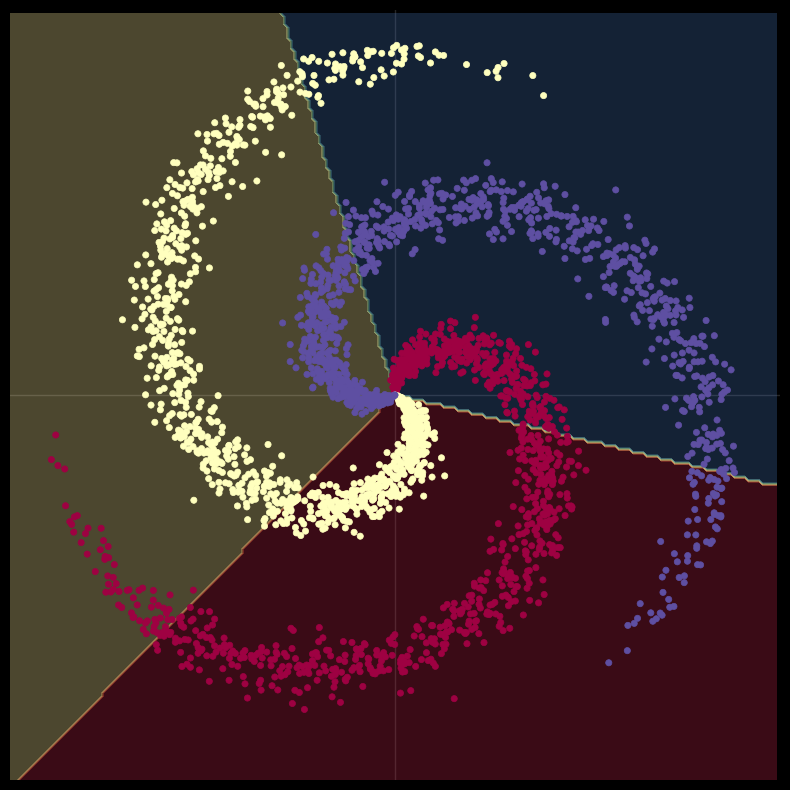

In [ ]:
print(model)
plot_model(X, y, model)

# No Linear


In [ ]:
learning_rate = 1e-3
lambdaa_l2 = 1e-5


# Definición del modelo
model = nn.Sequential(
    nn.Linear(n, d),
    nn.ReLU(),  
    nn.Linear(d, K)  # (Opcional) Comenta esta línea y descomenta la siguiente para mostrar incrustaciones 2D a continuación
    # nn.Linear(d, 2), nn.Linear(2, K)
)
model.to(device)  # enviar al dispositivo (GPU o CPU) si es posible

# Calcular la entropía cruzada dado los logits de salida
C = torch.nn.CrossEntropyLoss(reduction='none')

# Utilizar el optimizador Adam
optimiser = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=lambda_l2)  # L2 incorporado

# Bucle de entrenamiento en lotes completos
for t in range(2_000):
    
    # Realizar una pasada hacia adelante para obtener los logits
    l = model(X)
    
    # Calcular la energía libre F
    F = C(l, y)
    L = F.mean()
    
    # Poner a cero los gradientes
    optimiser.zero_grad()
    
    # Pasada hacia atrás para calcular y acumular el gradiente
    # de la energía libre con respecto a nuestros parámetros aprendibles
    L.backward()
    
    # Actualizar los parámetros
    optimiser.step()
    
    # Mostrar la época, L y la precisión
    overwrite(f'[EPOCH]: {t}, [LOSS]: {L.item():.6f}, [ACCURACY]: {acc(l, y):.3f}')

[EPOCH]: 1999, [LOSS]: 0.070025, [ACCURACY]: 0.993

Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=3, bias=True)
)


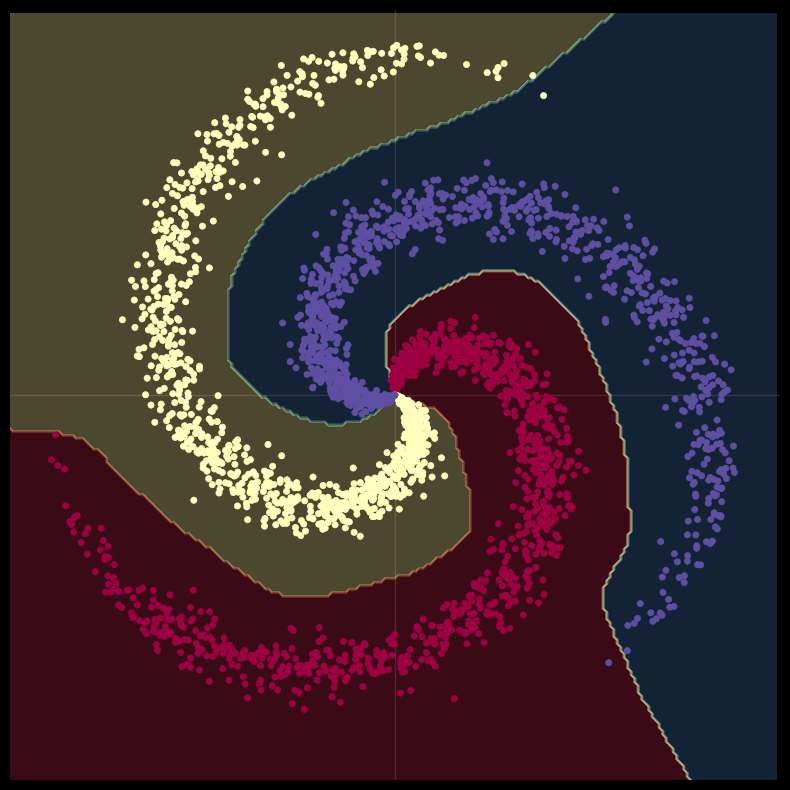

In [ ]:
print(model)
plot_model(X, y, model)